In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

import json

In [17]:
data = []
with open('skills.json') as f:
    for line in f:
        data.append(json.loads(line))

In [250]:
len(data)

11629

In [241]:
data[3]

{'id': '20950ab0-560d-3822-8666-d449aea1c28b',
 'skills': [{'src': {'at': 1475105660000, 'name': 'WEB', 'url': 'v2'},
   'val': 'Management'},
  {'src': {'at': 1475105660000, 'name': 'WEB', 'url': 'v2'},
   'val': 'Staff Development'},
  {'src': {'at': 1524956221000, 'name': 'web', 'url': 'v3'},
   'val': 'Management'},
  {'src': {'at': 1524956221000, 'name': 'web', 'url': 'v3'},
   'val': 'Staff Development'},
  {'src': {'at': 1526941719000, 'name': 'web', 'url': 'v4'},
   'val': 'Management'},
  {'src': {'at': 1526941719000, 'name': 'web', 'url': 'v4'},
   'val': 'Staff Development'},
  {'src': {'at': 1526941719000, 'name': 'web', 'url': 'v4'},
   'val': 'Management'},
  {'src': {'at': 1526941719000, 'name': 'web', 'url': 'v4'},
   'val': 'Staff Development'}],
 'ver': [2, 3, 4, 5]}

In [242]:
# dict mapping each user to the skills it has at each particular time stamp
user_skills = {} # str -> int -> str
for user in data:
    curr_user_skills = {}
    curr_skills = set()
    curr_time = user['skills'][0]['src']['at']
    for s in user['skills']:
        time_stamp = s['src']['at']
        if time_stamp != curr_time:
            curr_user_skills[curr_time] = curr_skills
            curr_skills = set()
            curr_time = time_stamp
        curr_skills.add(s['val'])
    curr_user_skills[curr_time] = list(curr_skills)
    user_skills[user['id']] = curr_user_skills

In [252]:
counter = 0
for user in user_skills:
    if len(user_skills[user]) > 1:
        counter += 1
print(counter)

4540


In [254]:
user_skills['20950ab0-560d-3822-8666-d449aea1c28b']

{1475105660000: {'Management', 'Staff Development'},
 1524956221000: {'Management', 'Staff Development'},
 1526941719000: ['Management', 'Staff Development']}

In [245]:
# dict mapping skill with directed edge to all other skills of weight based on # changes made
skills_changes = {} # str -> str -> int
count = 0
for user_id, skills in user_skills.items():
    ids = list(skills.keys())
    for s in skills[ids[0]]:
        if s not in skills_changes:
            skills_changes[s] = {}
    for i in range(1, len(ids)):
        curr = ids[i]
        prev = ids[i-1]
        for s in skills[curr]:
            if s not in skills_changes:
                skills_changes[s] = {}
            # skill added between prev and curr
            if s not in skills[prev]:
                for temp in skills[prev]:
                    if s in skills_changes[temp]:
                        skills_changes[temp][s] += 1
                    else:
                        skills_changes[temp][s] = 1
        for s in skills[prev]:
            # skill deleted between prev and curr
            if s not in skills[curr]:
                for temp in skills[prev]:
                    if temp == s:
                        continue
                    if s in skills_changes[temp]:
                        skills_changes[temp][s] -= 1
                    else:
                        skills_changes[temp][s] = -1
    

In [246]:
print(len(skills_changes))

22862


In [247]:
skills_changes['Tensorflow']

{'Algorithms': -1,
 'Amazon RDS': -1,
 'Apache': -1,
 'CSS': -1,
 'Data Extraction': -1,
 'Data Structures': -1,
 'Django': 0,
 'Git': -1,
 'HTML': -1,
 'Jasmine': -1,
 'Java': -1,
 'JavaScript': -1,
 'Linux': 0,
 'Maven': -1,
 'MySQL': 0,
 'Nginx': -1,
 'Node.js': -1,
 'Python': 0,
 'React': 0,
 'Scikit-Learn': -1}

In [248]:
def draw_graph(skill):
    G = nx.DiGraph()
    for node, weight in skills_changes[skill].items():
        G.add_edges_from([(skill, node)], weight=weight)
    return G

/Users/ericgan/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/ericgan/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/ericgan/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/ericgan/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

{('Tensorflow', 'Algorithms'): <matplotlib.text.Text at 0x11d1187b8>,
 ('Tensorflow', 'Amazon RDS'): <matplotlib.text.Text at 0x11d1cc4e0>,
 ('Tensorflow', 'Apache'): <matplotlib.text.Text at 0x11d1b3ac8>,
 ('Tensorflow', 'CSS'): <matplotlib.text.Text at 0x11d1cc7f0>,
 ('Tensorflow', 'Data Extraction'): <matplotlib.text.Text at 0x11d041940>,
 ('Tensorflow', 'Data Structures'): <matplotlib.text.Text at 0x11d4e43c8>,
 ('Tensorflow', 'Django'): <matplotlib.text.Text at 0x11d1c79b0>,
 ('Tensorflow', 'Git'): <matplotlib.text.Text at 0x11d4f3320>,
 ('Tensorflow', 'HTML'): <matplotlib.text.Text at 0x11d1b3da0>,
 ('Tensorflow', 'Jasmine'): <matplotlib.text.Text at 0x11d1b60b8>,
 ('Tensorflow', 'Java'): <matplotlib.text.Text at 0x11d041630>,
 ('Tensorflow', 'JavaScript'): <matplotlib.text.Text at 0x11d1b6860>,
 ('Tensorflow', 'Linux'): <matplotlib.text.Text at 0x11e0cadd8>,
 ('Tensorflow', 'Maven'): <matplotlib.text.Text at 0x11d49ccc0>,
 ('Tensorflow', 'MySQL'): <matplotlib.text.Text at 0x11d3

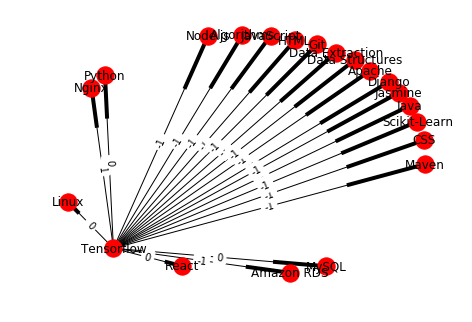

In [249]:
G = draw_graph('Tensorflow')
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)